In [27]:
# import numpy and exp mat
import os
import numpy as np
import matplotlib.pyplot as plt

from module.QuantumSystem import SHOscillator
from module.Walker import MetropolisWalker
from module.Utils import VMC

np.random.seed(0)

# Spherical Harmonic Oscillator without interaction, with Metropolis and analytical hamiltonian
In this notebook we study the Spherical Harmonic Oscillator without interaction, using the Metropolis algorithm and analytical hamiltonian.


## Ground state
Comparing ground state energy with analytical result

In [28]:
params = np.array([0.5])
warmup_steps = 50000
calibrate_steps = 50000
run_steps = 1000000

N = 20
D = 3

system = SHOscillator(N, D, params)
walker = MetropolisWalker(system)
vmc = VMC(system, walker, params, 
          warmup_steps, run_steps, 
          calibrate_steps, acceptance_rate=0.5,
          block_quantiles=0.8, plot=True, verbose=True)

-----------------
VMC calibrate
-----------------
delta: 1.2379400392853824e-05
subgroup_size: 1
Acceptance rate: 0.0
-----------------
VMC warmup
-----------------
Parameters: [0.5]
Acceptance rate: 0.0


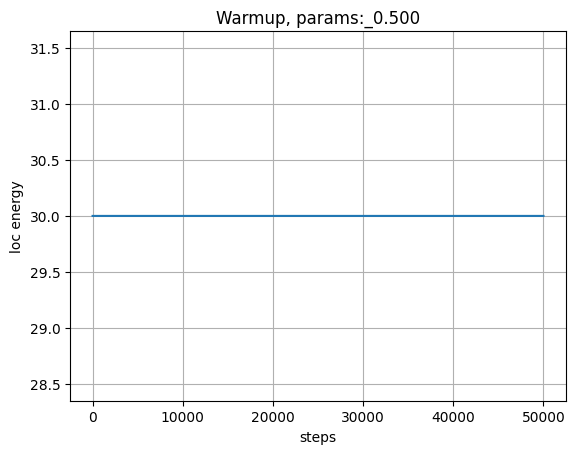

-----------------
VMC run
-----------------
Parameters: [0.5]
Acceptance rate: 0.0
Time:  2.204058885574341
Energy: 30.0 +/- 0.0


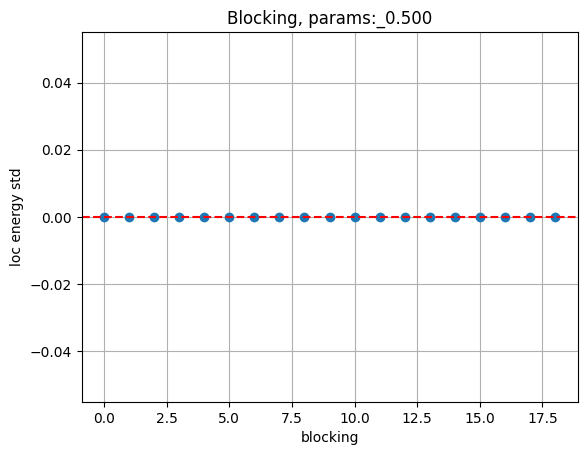

In [29]:
# warmup
vmc.calibrate()
vmc.warmup()
vmc.run()

## Compare with analytical results
In this section we compare the results of the grid search with the analytical results, in particular we show that the mean energy is the exact ground state energy of the system.

In [30]:
print('MC mean energy:', vmc.get_energy(), '+-', vmc.get_energy_std())  
print('Analytical energy:', 0.5*N*D, '+-', 0.0)

MC mean energy: 30.0 +- 0.0
Analytical energy: 30.0 +- 0.0
